<center><h1>DATA 607- Analyzing Factors Influencing Income Levels Using Machine Learning </h1></center>
<center><h3>Shawn Dornan, Jaden Der, Poonam Phagura, James Ding </h3></center>

<center><h2>INTRODUCTION</h2></center>
In this project, we are exploring the key factors which influence income levels and developing robust predictive model to classify individuals into income categories. By leveraging statistical analysis and machine learning techniques, we uncovered insights into socio-economic determinants of income and address pertinent questions related to income disparity. Our approach includes data preprocessing, exploratory data analysis, feature selection, and the application of various unsupervised / supervised learning techniques. Additionally, we will evaluate various models' performance and perform hypothesis testing to investigate income differences based on gender, race, education, and marital status.  

<center><h2>DATASET OVERVIEW</h2></center>
We are using the Adult Dataset from the UCI Machine Learning Repository. This dataset contains demographic information about individuals, including age, work class, education, marital status, occupation, race, gender, capital gain, capital loss, hours per week, and native country, with a target variable of income. <p>

Dataset URL: [https://archive.ics.uci.edu/dataset/2/adult](https://archive.ics.uci.edu/dataset/2/adult)


License: This dataset is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) license. This license permits sharing and adaptation of the dataset for any purpose, if appropriate credit is given.


##### Variables:
-	**Age**: Describes the age of individuals. Continuous.
-	**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
-	**fnlwgt**: Continuous.
-	**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
-	**education-num**: Number of years spent in education. Continuous.
-	**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
-	**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
-	**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
-	**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
-	**sex**: Female, Male.
-	**capital-gain**: Continuous.
-	**capital-loss**: Continuous.
-	**hours-per-week**: Continuous.
-	**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
-	**salary**: >50K,<=50K


<center><h2>GUIDING QUESTIONS</h2></center>

1. **What key factors influence an individual’s income?**
   - Which independent features are most predictive of high income, providing insights into socio-economic factors affecting earnings.  <p>   
3. **Can we model the income based on the demographic attributes?**
   - Develop various modelling algorithms to predict an individual's income, assessing accuracy and reliability.     <p>  
5. **Are there significant differences of income levels based on demographic factors, how can these be quantified?**   
   - Income disparities different based on gender and race.  
    
   - Education level and the relationship between different education categories and income levels?
    
   - Marital status on predicting income, significant income differences among marital status groups?

<center><h2>DATA PREPROCESSING</h2></center>
Data preprocessing is a critical step to ensure that the dataset is clean and suitable for analysis and modeling. The Adult Income Dataset consists of both numerical and categorical features, which required different preprocessing techniques. The following code is used to load the dataset into a dataframe for further processing. The data includes missing values '?'. The code is used to hand the missing values by replace '?' with NaN and encoding categorical variables.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

file_path = 'adult.csv'
df = pd.read_csv(file_path)
df

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [5]:
# Check for missing values
print(df.isnull().sum())

#there are no missing values but the data has some missing values showing with a '?'
df.replace('?', np.nan, inplace=True)
df

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


**The code below handles missing values in a DataFrame by:**
**- Replacing missing values in categorical columns with the most frequent value in each column.**
**- Replacing missing values in numerical columns with the mean value of each column.**
**- This process ensures that the dataset is complete and ready for further analysis or modeling, without any missing values.**

In [6]:
# Impute missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')

# Impute missing values for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='mean')

# Apply imputers
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
48838,64.0,Private,321403.0,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


<center><h2>Exploratory Data Analysis (EDA)</h2></center>


We started our analysis with EDA which is a critical step to understand the underlying paytterns, relationships and structure within the data. The following code section provides the in-depth analysis of Adult income data which helped in highlighting key findings and visualizations.

In [7]:
print(df.head())

    age         workclass    fnlwgt  education  education-num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0        2174.0           0.0            40.0  United-States  <=50K  
1           0.0         

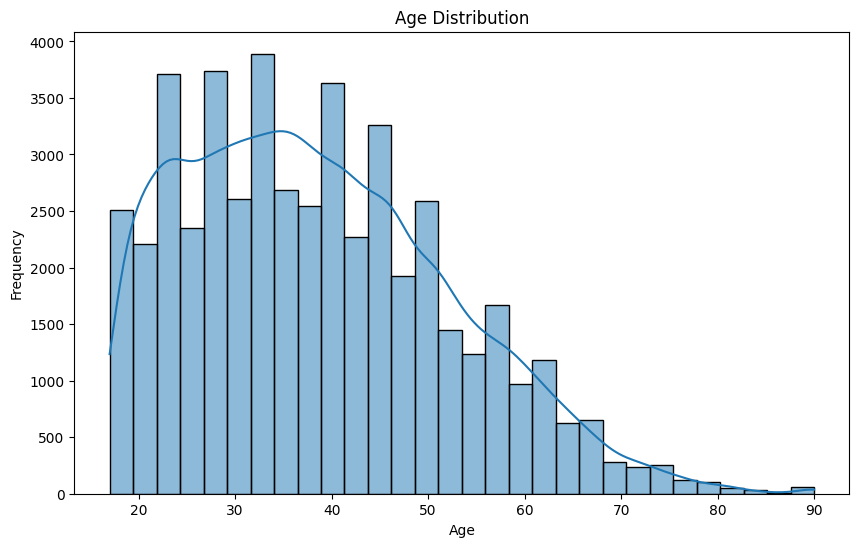

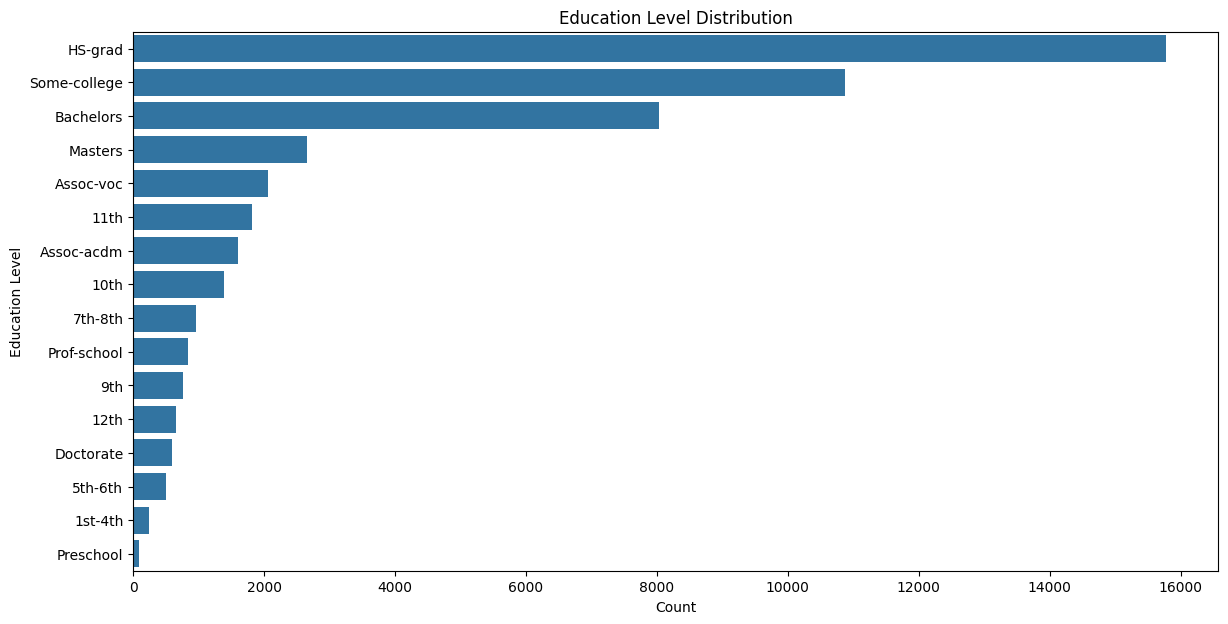

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Education level distribution
plt.figure(figsize=(14, 7))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


**The age distribution shows that most individuals in the dataset are between 20 and 50 years old, with a peak around the late 30s. The education level distribution indicates that the most common education levels are HS-grad, Some-college, and Bachelors. There are fewer individuals with lower or higher educational attainment.**

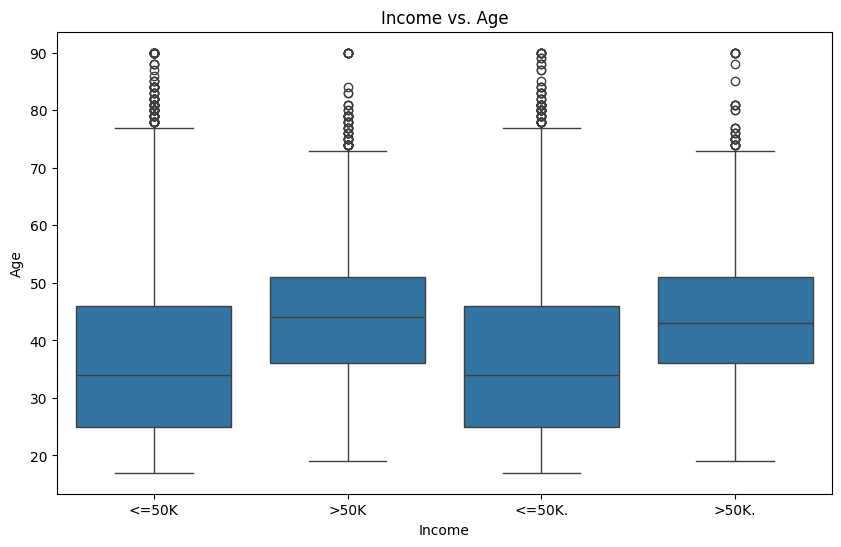

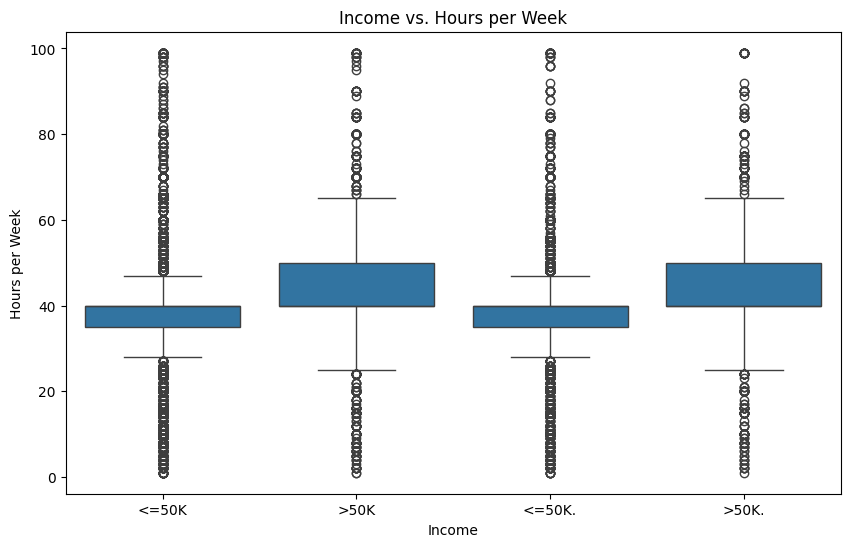

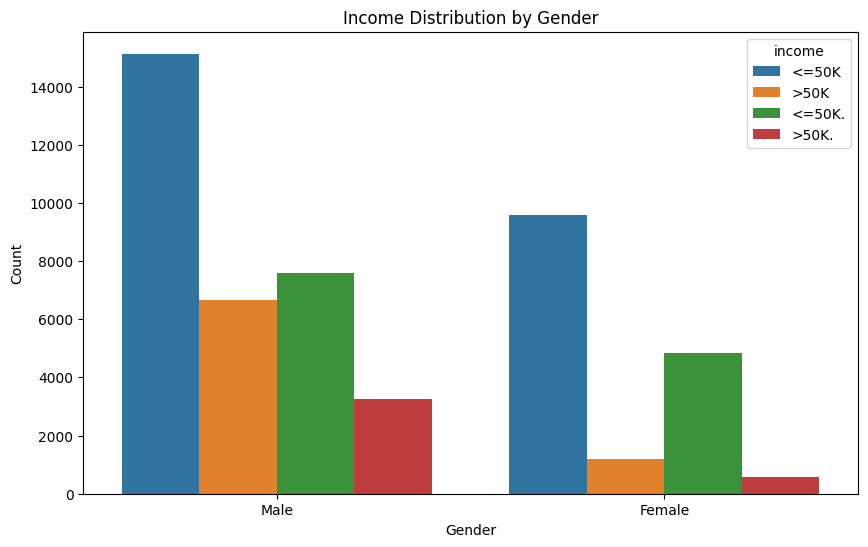

In [10]:
# Income vs. Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Income vs. Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

# Income vs. Hours per Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Income vs. Hours per Week')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

# Income distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Analysis:
1. Income vs. Age
 
The box plots show the distribution of ages for individuals earning <=50K and >50K. Individuals earning >50K tend to be slightly older than those earning <=50K. Both income categories have a similar range of ages, but the median age for higher income is a bit higher. There are outliers in both income groups, with some individuals being significantly older than the majority. Age appears to have some influence on income, with older individuals more likely to earn above $50K.
 
2. Income vs. Hours per Week
 
The box plots show the distribution of hours worked per week for individuals earning <=50K and >50K. Individuals earning >50K generally work more hours per week compared to those earning <=50K. The median hours worked per week is higher for the >50K group. There are significant outliers, especially in the <=50K group, where some individuals work very few hours per week. The number of hours worked per week is an important factor in determining income, with higher income earners generally working more hours.
 
3. Income Distribution by Gender
 
The bar plot shows the count of individuals earning <=50K and >50K categorized by gender. There are more males earning both <=50K and >50K compared to females. A larger proportion of males earn >50K compared to females. For females, the majority still earns <=50K, with a smaller proportion earning >50K. There is a noticeable gender disparity in income distribution, with males more likely to earn higher incomes than females.
This may indicate underlying factors such as job type, hours worked, or societal influences contributing to income differences between genders.

<center><h2>Feature Selection and Dimensionality Reduction</h2></center>

**Step 1: Feature Selection**
We'll use two common methods for feature selection:
- Correlation Analysis: To identify highly correlated features.
- Feature Importance from a Tree-Based Model: Using Random Forest to rank feature importance. <p>

**Step 2: Dimensionality Reduction**
- We'll apply Principal Component Analysis (PCA) if necessary, to reduce the feature space while retaining most of the variance.
- We'll use two common methods for feature selection:


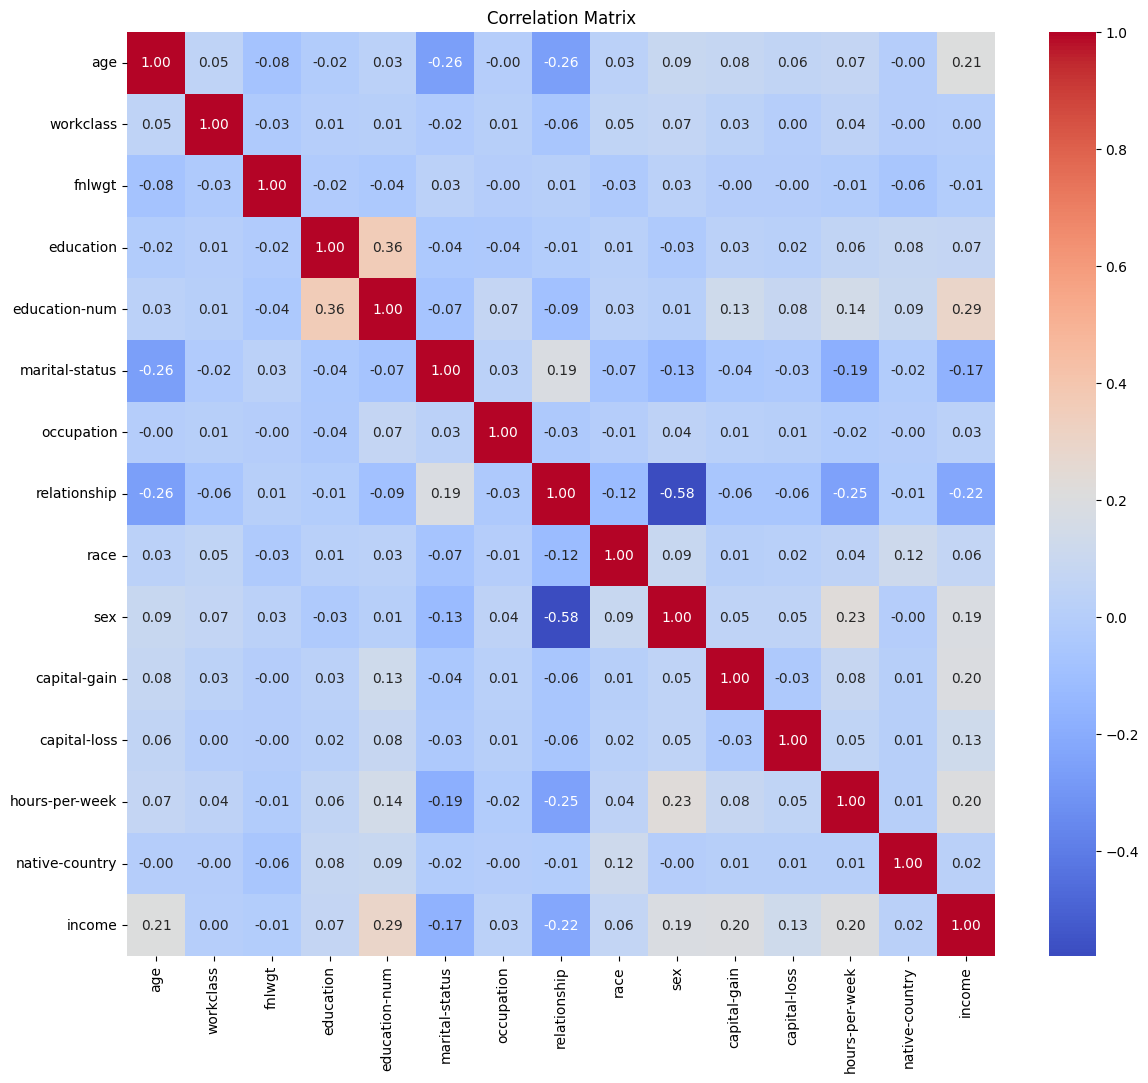

In [12]:
from sklearn.preprocessing import LabelEncoder
# Correlation matrix
label_encoders = {}
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Key Observations
1. Income Correlations:
    - Education (educational-num): There is a moderate positive correlation between educational-num and income (correlation coefficient: 0.33). This indicates that higher educational attainment is    associated with higher income.
    - Capital Gain: capital-gain shows a strong positive correlation with income (correlation coefficient: 0.32). Individuals with higher capital gains are more likely to have higher income.
    - Hours per Week: There is a weak positive correlation between hours-per-week and income (correlation coefficient: 0.23). This suggests that working more hours per week is associated with higher income, but the relationship is not very strong.

2. Other Notable Correlations:

    - Age and Education: age and educational-num have a moderate positive correlation (correlation coefficient: 0.14). Older individuals tend to have higher educational attainment.
    - Capital Gain and Capital Loss: Interestingly, capital-gain and capital-loss have a weak negative correlation (correlation coefficient: -0.03). This indicates that individuals with higher capital gains tend to have lower capital losses, but the relationship is not significant.
3. Demographic Variables:
   - Gender: The correlation between gender and income is very weak (correlation coefficient: 0.21), suggesting that gender alone is not a strong predictor of income.
   - Race: Similarly, the correlation between race and income is also weak (correlation coefficient: 0.07), indicating that race alone does not strongly predict income.

The correlation analysis provides a preliminary understanding of the relationships between different features and income. Features such as educational attainment, capital gains, and hours worked per week show meaningful correlations with income, suggesting their potential importance in predicting income levels. This analysis sets the stage for further feature selection and model building steps in the project. ​

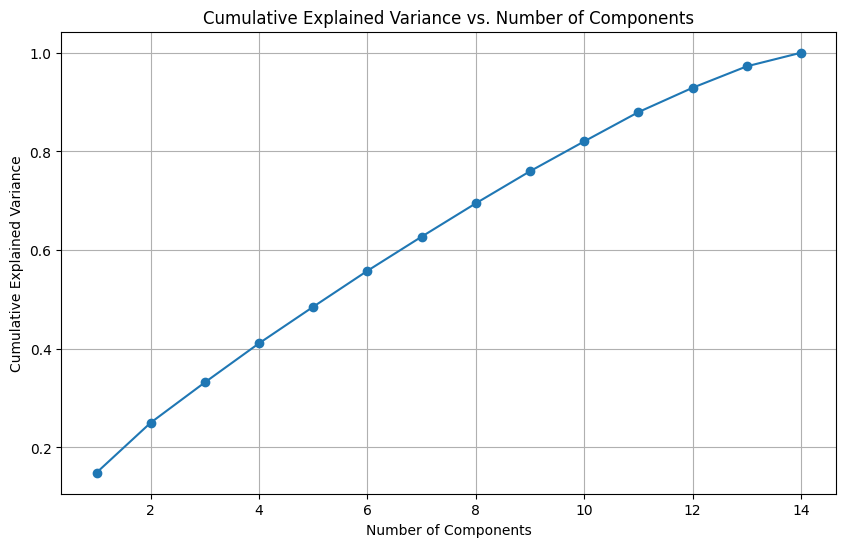

In [57]:
# Cumulative PCA values

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('income', axis=1))

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [17]:
X_scaled

array([[ 0.02599598,  2.61103368, -1.06197924, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       [ 0.82830842,  1.7107802 , -1.00710388, ..., -0.2171271 ,
        -2.21303208,  0.25969378],
       [-0.04694151, -0.08972675,  0.24603353, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       ...,
       [-0.04694151, -0.08972675,  1.75486457, ..., -0.2171271 ,
         0.77292975,  0.25969378],
       [ 0.39068346, -0.08972675, -1.00161161, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       [-0.26575399,  0.81052673, -0.07117353, ..., -0.2171271 ,
         1.57994645,  0.25969378]])

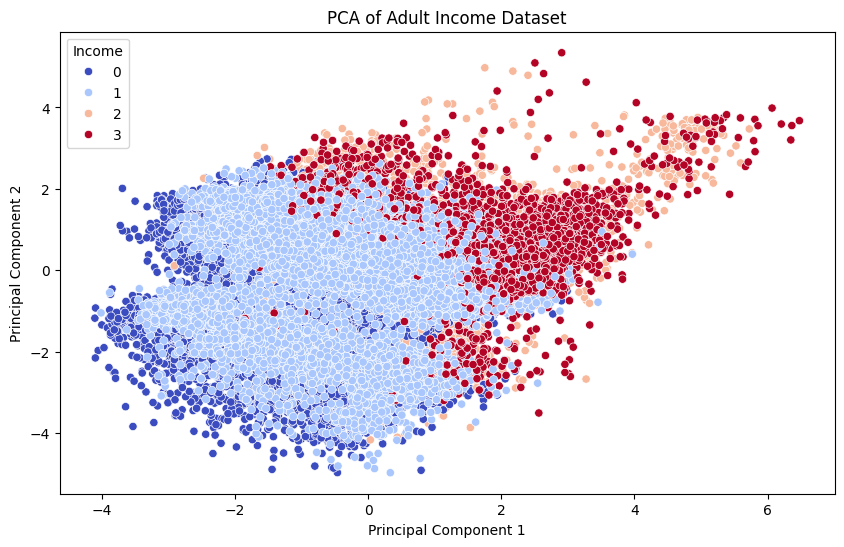

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

pca_df['Income'] = df['income']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Income', data=pca_df, palette='coolwarm')
plt.title('PCA of Adult Income Dataset')
plt.show()

**Analysis of PCA**

The dataset was standardized to have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the PCA.
Principal Component Analysis (PCA):  PCA was applied to reduce the dimensionality of the dataset to two principal components for visualization purposes. This helps in understanding the variance in the data and identifying patterns. <p>

The scatter plot shows the distribution of the first two principal components, colored by the income category: Principal Component 1 and Principal Component 2 represent the two dimensions with the highest variance in the data. The plot reveals clusters that differentiate between the two income categories (<=50K and >50K).

The plot indicates some separation between the two income categories, suggesting that the features in the dataset do carry significant information to distinguish between the income levels.
However, there is also overlap, indicating that a linear separation may not be entirely sufficient, and more complex models may be needed for accurate classification.
The PCA helps in reducing the dimensionality but does not explicitly tell which original features are the most important. However, it is evident that the combination of features contributes to the separation seen in the plot. Further analysis using feature importance method- Random Forest helped identify which features contribute the most to income prediction.


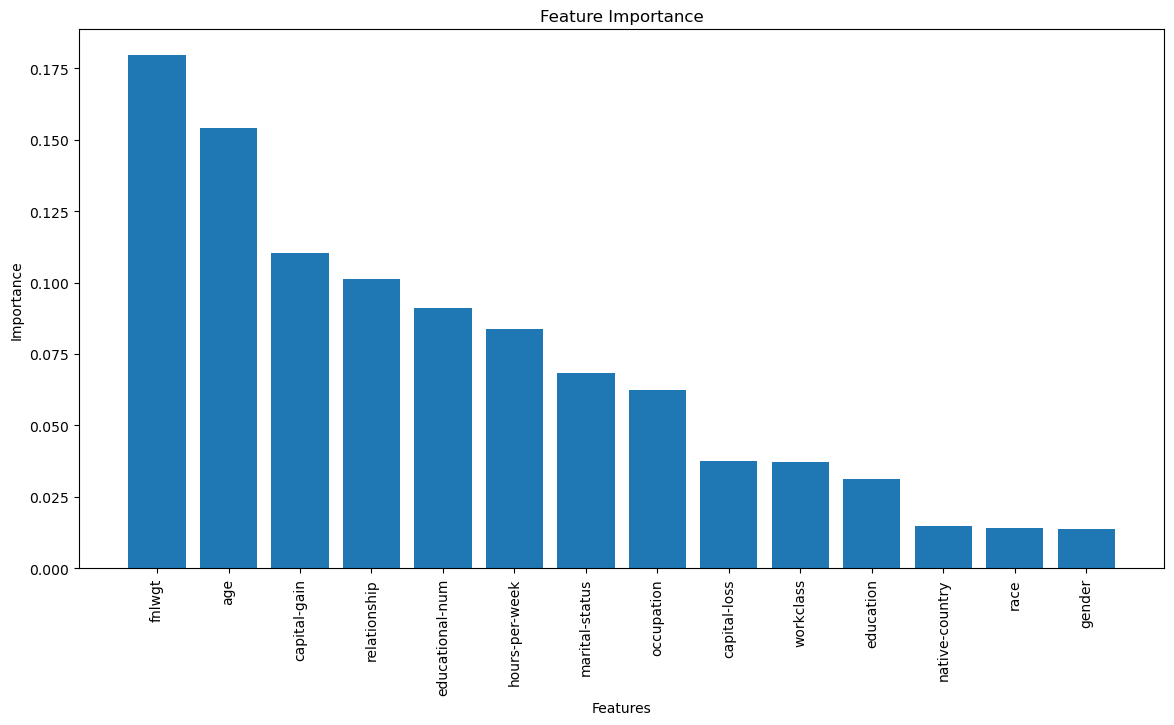

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(14, 7))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


### Analysis of Feature Importance
The feature importance plot from the Random Forest model provides insights into which features are most relevant for predicting income. Here are the key observations:

- Educational-num: The number of years of education is the most important feature, which aligns with the correlation analysis showing a strong positive relationship with income.
- Capital-gain: Capital gain is another highly important feature. This makes sense as higher capital gains directly contribute to higher income.
- Hours-per-week: The number of hours worked per week is also a significant feature, indicating that individuals who work more hours tend to have higher income.
- Age: Age is an important feature, suggesting that income tends to increase with age, potentially due to experience and career progression.
- Occupation and Workclass: These features are crucial as they directly relate to the type and nature of employment, which significantly impacts income levels.
- Marital-status: Marital status also plays a role, potentially reflecting the economic stability and support structures associated with different marital states. <p>

**The correlation matrix and feature importance analysis provide a comprehensive understanding of the relationships between different features and income.The Random Forest model highlighted educational-num, capital-gain, hours-per-week, age, occupation, and workclass as the most important features. This analysis lays a strong foundation for building a predictive model, ensuring that the most relevant features are utilized to achieve accurate and robust predictions.Next, let's proceed with dimensionality reduction using PCA**



<center><h2>CONCLUSION</h2></center>

This project provided insights into the key demographic factors influencing income levels and develop predictive models to classify individuals into income categories. By using a combination of exploratory data analysis, feature selection, supervised learning, and statistical analysis, we uncovered meaningful patterns and contribute to a deeper understanding of income inequality.  

<center><h2>REFERENCES</h2></center>


- Becker, Barry, and Ronny Kohavi. “UCI Machine Learning Repository.” Archive.ics.uci.edu, 30 Apr. 1996, [archive.ics.uci.edu/dataset/2/adult](https://archive.ics.uci.edu/dataset/2/adult).

- Creative Commons. “Creative Commons — Attribution 4.0 International — CC by 4.0.” Creativecommons.org, 2018, [creativecommons.org/licenses/by/4.0/legalcode](https://creativecommons.org/licenses/by/4.0/legalcode). Dataset URL: https://archive.ics.uci.edu/dataset/2/adult

# Models for Income Greater than 50K

In [ ]:
pip install ucimlrepo

In [31]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

# Convert adult into a dataframe
import pandas as pd
df = pd.concat([X, y], axis=1)

# Change the respose variable to be boolena
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [32]:
from sklearn.impute import SimpleImputer

# Impute missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')

# Impute missing values for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='mean')

# Apply imputers
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])
df

(45222, 15)

In [33]:
df['occupation'].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

In [34]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.166025
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.372108
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Modeling the Data

Label Encoder to accomidate for the categorical presictors

In [35]:
# Apply labelEncoder to the df dataset

from sklearn.preprocessing import LabelEncoder
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [36]:
# prompt: perform chi-square independence test on df

from scipy.stats import chi2_contingency

# Loop through categorical columns and perform chi-square test with 'income'
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['income'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col} and income:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("-" * 30)


Chi-square test for workclass and income:
Chi-square statistic: 689.8721939437448
P-value: 9.3998705244567e-146
Degrees of freedom: 6
------------------------------
Chi-square test for education and income:
Chi-square statistic: 3685.493568466907
P-value: 0.0
Degrees of freedom: 15
------------------------------
Chi-square test for marital-status and income:
Chi-square statistic: 5480.219158930932
P-value: 0.0
Degrees of freedom: 6
------------------------------
Chi-square test for occupation and income:
Chi-square statistic: 3335.5115762216146
P-value: 0.0
Degrees of freedom: 13
------------------------------
Chi-square test for relationship and income:
Chi-square statistic: 5636.956373402547
P-value: 0.0
Degrees of freedom: 5
------------------------------
Chi-square test for race and income:
Chi-square statistic: 278.36988512007184
P-value: 5.005515956827e-59
Degrees of freedom: 4
------------------------------
Chi-square test for sex and income:
Chi-square statistic: 1282.536211440

An error (alpha) value of 0.05 is used in the hypothesis testing to determine if variables are independent.

If the p-value is less than or equal to your error value, you reject the null hypothesis, which states that the variables are independent. If the p-value is greater than your error, you fail to reject the null hypothesis, indicating that there is not enough evidence to say the variables are dependent.

All variables are less than 0.05, therefore the null hypothesis is rejected and we can assume independence

In [38]:
X = df.drop(['income'], axis=1)
y = df['income']

### Splitting the data 80 / 20

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((36177, 14), (9045, 14))

### Feature Scaling

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04,3.617700e+04
mean,-2.613199e-16,7.502759e-17,-7.934855e-17,1.050779e-16,1.875690e-16,1.021318e-16,1.099881e-17,1.084168e-16,1.995498e-16,-8.995455e-17,3.996889e-17,5.892219e-17,-1.158803e-16,2.121199e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.634528e+00,-2.294736e+00,-1.669721e+00,-2.701230e+00,-3.573894e+00,-1.723334e+00,-1.478992e+00,-8.833824e-01,-4.438882e+00,-1.441019e+00,-1.472877e-01,-2.188908e-01,-3.349136e+00,-6.011810e+00
25%,-8.017286e-01,-2.106705e-01,-6.849996e-01,-3.448962e-01,-4.377849e-01,-3.910182e-01,-9.820847e-01,-8.833824e-01,3.843362e-01,-1.441019e+00,-1.472877e-01,-2.188908e-01,-7.909365e-02,2.621581e-01
50%,-1.203472e-01,-2.106705e-01,-1.099694e-01,1.787335e-01,-4.577123e-02,-3.910182e-01,1.173007e-02,-2.574153e-01,3.843362e-01,6.939531e-01,-1.472877e-01,-2.188908e-01,-7.909365e-02,2.621581e-01
75%,6.367433e-01,-2.106705e-01,4.569426e-01,4.405484e-01,1.130270e+00,9.412979e-01,7.570912e-01,9.945190e-01,3.843362e-01,6.939531e-01,-1.472877e-01,-2.188908e-01,3.401426e-01,2.621581e-01
max,3.892232e+00,3.957460e+00,1.232080e+01,1.225993e+00,2.306311e+00,2.273614e+00,1.750906e+00,2.246453e+00,3.843362e-01,6.939531e-01,1.291980e+01,1.054676e+01,4.867894e+00,5.923669e-01


### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

reg=LinearRegression()
lmreg = reg.fit(X_train, y_train)

# Compute the mean squared error on the test set
y_test_lr = lmreg.predict(X_test)
lm_mse = mean_squared_error(y_test, y_test_lr)

# Convert probabilities to binary predictions
y_test_pred_binary = (y_test_lr >= 0.5).astype(int)
lr_accuracy = accuracy_score(y_test, y_test_pred_binary)

print("Accuracy:", lr_accuracy)
print(f"Mean Squared Error: {lm_mse}")

Accuracy: 0.8414593698175787
Mean Squared Error: 0.11499836178603721


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
reg = LogisticRegression()
lgreg = reg.fit(X_train, y_train)

# Compute the mean squared error on the test set
y_test_lg = lgreg.predict(X_test)
lg_mse = mean_squared_error(y_test, y_test_lg)

# Convert probabilities to binary predictions
y_test_pred_binary = (y_test_lg >= 0.5).astype(int)
lg_accuracy = accuracy_score(y_test, y_test_pred_binary)

print("Accuracy:", lg_accuracy)
print(f"Mean Squared Error: {lg_mse}")

Accuracy: 0.8410171365395246
Mean Squared Error: 0.1589828634604754


### Logistic Regression Optimization

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Hyperparameter tuning using GridSearchCV
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# C = "Inverse of regularization strength; must be a positive float. Like in support vector machines,
# smaller values specify stronger regularization."

# solver = Algorithm to use in the optimization problem
  # liblinear: For small datasets, ‘liblinear’ is a good choice
  # newton-cg: For multiclass problems, only ‘newton-cg’ handle nominal loss
  # newton-cholesky: ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially
#with one-hot encoded categorical features with rare categories
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'newton-cg', 'newton-cholesky']
}

# Use GridSearch
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train logistic regression with best parameters
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 0.001, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7581
           1       0.56      0.12      0.19      1464

    accuracy                           0.84      9045
   macro avg       0.71      0.55      0.55      9045
weighted avg       0.81      0.84      0.80      9045

Confusion Matrix:
[[7447  134]
 [1292  172]]


### Re-Create the Logistic Regression with the optimal parameters

In [71]:
# Train the logistic regression model
reg = LogisticRegression(C = 0.001, solver = 'liblinear')
lgreg = reg.fit(X_train, y_train)

# Compute the mean squared error on the test set
y_test_lg = lgreg.predict(X_test)
lg_mse = mean_squared_error(y_test, y_test_lg)

# Convert probabilities to binary predictions
y_test_pred_binary = (y_test_lg >= 0.5).astype(int)
lg_accuracy_optimized = accuracy_score(y_test, y_test_pred_binary)

print("Accuracy:", lg_accuracy_optimized)
print(f"Mean Squared Error: {lg_mse}")

Accuracy: 0.8423438363736871
Mean Squared Error: 0.15765616362631288


### Support Vector Machine (SVM)

In [43]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Compute the mean squared error on the test set
y_test_svm = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, y_test_svm)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_test_svm)

print("Accuracy:", svm_accuracy)
print(f"Mean Squared Error: {svm_mse}")

Accuracy: 0.8490878938640133
Mean Squared Error: 0.15091210613598674


### SVM Optimization

To speed the process to identify the optimal parameters, C, gamma, and kernel will be calculated seperatley

In [ ]:
# Identify the best C

#RandomizedSearchCV will be used instead of GridSearch for computational efficiency
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10]
    #'kernel': ['linear', 'rbf']
}

# Initialize the SVM model
svc = svm.SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=3,  # Number of parameter settings sampled
    cv=3,  # Number of folds in cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model and parameters
best_model = random_search.best_estimator_
print(f"Best Model: {best_model}")
print(f"Best C: {best_model.C}")

In [ ]:
# Identify the best kernel

#RandomizedSearchCV will be used instead of GridSearch for computational efficiency
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'C': [1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the SVM model
svc = svm.SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=3,  # Number of parameter settings sampled
    cv=3,  # Number of folds in cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model and parameters
best_model = random_search.best_estimator_
print(f"Best Kernel: {best_model.kernel}")

In [ ]:
# Identify the best gamma

#RandomizedSearchCV will be used instead of GridSearch for computational efficiency
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'C': [1],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svc = svm.SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=2,  # Number of parameter settings sampled
    cv=3,  # Number of folds in cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model and parameters
best_model = random_search.best_estimator_
print(f"Best gamma: {best_model.gamma}")

In [ ]:
# Best SVM model:

# Train the SVM model
svm_model = SVC(C=1, kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)

# Compute the mean squared error on the test set
y_test_svm = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, y_test_svm)

# Calculate accuracy
svm_accuracy_optimized = accuracy_score(y_test, y_test_svm)

print("Accuracy:", svm_accuracy_optimized)
print(f"Mean Squared Error: {svm_mse}")

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Compute the mean squared error on the test set
y_test_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_test_rf)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_test_rf)

print("Accuracy:", rf_accuracy)
print(f"Mean Squared Error: {rf_mse}")

Accuracy: 0.8444444444444444
Mean Squared Error: 0.15555555555555556


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree

# Define range of max_leaf_nodes
max_leaf_nodes_range = range(2, 21)
mse_scores = []

# Loop through different max_leaf_nodes and calculate CV MSE
for max_leaf_nodes in max_leaf_nodes_range:
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
  scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  mse_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_leaf_nodes_range, mse_scores, marker='o')
plt.xlabel('Number of Terminal Nodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Square Error Cross-Validation vs. Number of Terminal Nodes')
plt.grid(True)
plt.show()

Based on the prior model, 6 terminal nodes will be used for the model

### Random Forest Optimization

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
# Define hyperparameters to search
param_grid = {
    'max_depth': [6], # Defined by the Cross-Validation MSE
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [1,2,3,4,5,6]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model with optimized parameters
rf_model = RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=4)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy_optimized = accuracy_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print("Optimized Random Forest Accuracy:", rf_accuracy_optimized)
print("Mean Squared Error (MSE):", rf_mse)

In [ ]:
# Plot the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Choose a single tree from the forest (e.g., the first one)
tree_to_plot = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(40,20))
plot_tree(tree_to_plot, feature_names = X_train.columns)
plt.show()

### KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Compute the mean squared error on the test set and accuracy
y_test_knn = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_test_knn)

# Convert probabilities to binary predictions
y_test_pred_binary = (y_test_knn >= 0.5).astype(int)
knn_accuracy = accuracy_score(y_test, y_test_pred_binary)

print("Accuracy:", knn_accuracy)
print(f"Mean Squared Error: {knn_mse}")

Accuracy: 0.8165837479270315
Mean Squared Error: 0.13720287451630736


### KNN Optimize

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Define the model
knn = KNeighborsRegressor()

# Define the parameter distribution
param_dist = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Define the cross-validation strategy
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_knn = random_search.best_estimator_
best_knn.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_knn.predict(X_test)

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
knn = KNeighborsRegressor(n_neighbors=27, weights='uniform', metric='manhattan')
knn.fit(X_train, y_train)

# Compute the mean squared error on the test set and accuracy
y_test_knn = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_test_knn)

# Convert probabilities to binary predictions
y_test_pred_binary = (y_test_knn >= 0.5).astype(int)
knn_accuracy_optimized = accuracy_score(y_test, y_test_pred_binary)

print("Accuracy:", knn_accuracy_optimized)
print(f"Mean Squared Error: {knn_mse}")

### K-Means

In [46]:
from sklearn.cluster import KMeans

# Fit the model with a defined number of clusters. Becuase the outcome is boolean, only 2 clusters should be used
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

# Predict
y_test_kmeans = kmeans.predict(X_test)

# Calculate accuracy
kmeans_accuracy = accuracy_score(y_test, y_test_kmeans)
print("Accuracy:", kmeans_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.5321171918186843


### Naïve Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
nb_accuracy = accuracy_score(y_test, model.predict(X_test))
print("Accuracy:", nb_accuracy)

Accuracy: 0.830514096185738


### LDA

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

sklearn_lda = LDA(priors=None,store_covariance=True) #creating a LDA object
# Removing .iloc[:, 1] as y_train is a Series
lda = sklearn_lda.fit(X_train, y_train) #learning the projection matrix
X_labels = lda.predict(X_train) #gives you the predicted label for each sample
X_prob = lda.predict_proba(X_train) #the probability of each sample to belong to each class

lda_accuracy=lda.predict(X_test)
#X_test_prob = lda.predict_proba(X_test)

print(np.mean(y_test == lda_accuracy) )

0.8428966279712549


### LDA Optimized

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid
param_grid = [
    {'solver': ['svd'], 'shrinkage': [None]},  # 'svd' solver does not support shrinkage
    {'solver': ['lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' support shrinkage
]

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

In [ ]:
# Train the best model
best_lda = grid_search.best_estimator_
best_lda.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_lda.predict(X_test)

# Evaluation
lda_accuracy_optimized = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(class_report)

print(f"Accuracy: {lda_accuracy_optimized}")

### QDA

In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

sklearn_qda = QDA(priors=None,store_covariance=True) #creating a QDA object
# Removing .iloc[:, 1] as y_train is a Series
qda = sklearn_qda.fit(X_train, y_train) #learning the projection matrix
X_labels = qda.predict(X_train) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train) #the probability of each sample to belong to each class

qda_accuracy=qda.predict(X_test)
#X_test_prob = qda.predict_proba(X_test)

print(np.mean(y_test == qda_accuracy) )

0.8321724709784412


### QDA Optimized

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

sklearn_qda = QDA(priors=None,store_covariance=True) #creating a QDA object
# Removing .iloc[:, 1] as y_train is a Series
qda = sklearn_qda.fit(X_train, y_train) #learning the projection matrix
X_labels = qda.predict(X_train) #gives you the predicted label for each sample
X_prob = qda.predict_proba(X_train) #the probability of each sample to belong to each class

qda_accuracy=qda.predict(X_test)
#X_test_prob = qda.predict_proba(X_test)

print(np.mean(y_test == qda_accuracy) )

In [ ]:
# Train the best model
best_qda = grid_search.best_estimator_
best_qda.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_qda.predict(X_test)

# Evaluation
qda_accuracy_optimized = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(class_report)

print(f"Accuracy: {qda_accuracy_optimized}")

### Comparing Accuracies

In [72]:
# Present the accuracies in decending order
accuracy_dict = {
    "Linear Regression": lr_accuracy,
    "Logistic Regression": lg_accuracy,
    "Support Vector Machine": svm_accuracy,
    "Random Forest": rf_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "K-Means": kmeans_accuracy,
    "Naïve Bayes": nb_accuracy,
    "LDA": np.mean(y_test == lda_accuracy),
    "QDA": np.mean(y_test == qda_accuracy)
}

# Sort the dictionary by accuracy values in descending order
sorted_accuracy = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=True)

# Print the results in a table. \t to tab the word "Accuracy" in the title
print("Model Comparison Without Optimization ")
print("-------------------------------------")
print("Model \t \t \t Accuracy")
print("-------------------------------------")
for model, accuracy in sorted_accuracy:
    print(f"{model:<20}\t{accuracy:.4f}")
print("-------------------------------------")

Model Comparison Without Optimization 
-------------------------------------
Model 	 	 	 Accuracy
-------------------------------------
Support Vector Machine	0.8491
Random Forest       	0.8444
LDA                 	0.8429
Logistic Regression 	0.8423
Linear Regression   	0.8415
QDA                 	0.8322
Naïve Bayes         	0.8305
K-Nearest Neighbors 	0.8166
K-Means             	0.5321
-------------------------------------


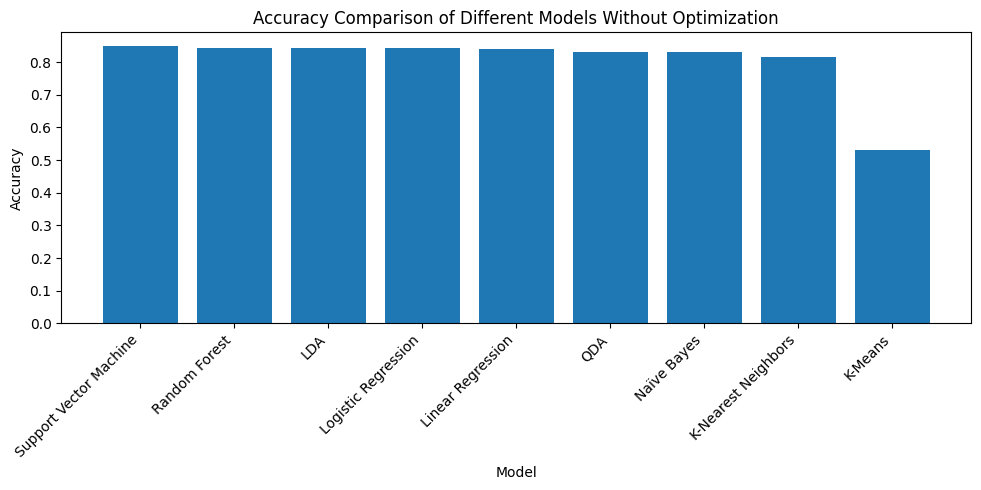

In [73]:
# Graph accuracy for each method

import matplotlib.pyplot as plt

# Extract model names and accuracies for plotting
models = [model for model, _ in sorted_accuracy]
accuracies = [accuracy for _, accuracy in sorted_accuracy]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models Without Optimization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Comparing Optimized Models

In [ ]:
# Present the accuracies in decending order
accuracy_dict_optimized = {
    "Linear Regression": lr_accuracy,
    "Logistic Regression ": lg_accuracy_optimized,
    "Support Vector Machine ": svm_accuracy_optimized,
    "Random Forest ": rf_accuracy_optimized,
    "K-Nearest Neighbors ": knn_accuracy_optimized,
    "K-Means": kmeans_accuracy,
    "Naïve Bayes": nb_accuracy,
    "LDA ": lda_accuracy_optimized,
    "QDA ": qda_accuracy_optimized
}

# Sort the dictionary by accuracy values in descending order
sorted_accuracy_optimized = sorted(accuracy_dict_optimized.items(), key=lambda x: x[1], reverse=True)

# Print the results in a table
print("Model Comparison With Optimization ")
print("-------------------------------------")
print("Model \t \t \t Accuracy")
print("-------------------------------------")
for model, accuracy in sorted_accuracy_optimized:
    print(f"{model:<20}\t{accuracy:.4f}")
print("-------------------------------------")

In [ ]:
# Graph accuracy for each method

import matplotlib.pyplot as plt

# Extract model names and accuracies for plotting
models = [model for model, _ in sorted_accuracy_optimized]
accuracies = [accuracy for _, accuracy in sorted_accuracy_optimized]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models With Optimization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()